<a href="https://colab.research.google.com/github/Kits1700/WaterEnergy/blob/main/AirRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


In [3]:
# resample minute data to total for each day
from pandas import read_csv
# load the new file
dataset = read_csv('/content/drive/My Drive/city_day.csv', header=0, index_col=0)
dataset.head(20)

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,
Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN


In [4]:
# mark all missing values
from numpy import nan
dataset.replace('?', nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')

ValueError: ignored

In [5]:
dataset.dtypes

Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [6]:
import pandas as pd
dataset.Date = pd.to_datetime(dataset.Date)

In [7]:
dataset.dtypes

Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object

In [28]:
# fill missing values with a value at the same time one day ago
from numpy import isnan
def fill_missing(x):
    	if isnan(x):
				  x=0.0


In [29]:
# fill missing
fill_missing(dataset.values)

TypeError: ignored

In [15]:
X = dataset['Date'].values
y = dataset['NO2'].values

In [16]:
print(y)

[18.22 15.69 19.3  ... 29.53 29.26 26.85]


In [17]:
print(X)

['2015-01-01T00:00:00.000000000' '2015-01-02T00:00:00.000000000'
 '2015-01-03T00:00:00.000000000' ... '2020-06-29T00:00:00.000000000'
 '2020-06-30T00:00:00.000000000' '2020-07-01T00:00:00.000000000']


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [19]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

ValueError: ignored

In [30]:
print(dataset)
remove_nan = dataset. dropna()
print(remove_nan)

                    Date  PM2.5   PM10  ...  Xylene   AQI    AQI_Bucket
City                                    ...                            
Ahmedabad     2015-01-01    NaN    NaN  ...    0.00   NaN           NaN
Ahmedabad     2015-01-02    NaN    NaN  ...    3.77   NaN           NaN
Ahmedabad     2015-01-03    NaN    NaN  ...    2.25   NaN           NaN
Ahmedabad     2015-01-04    NaN    NaN  ...    1.00   NaN           NaN
Ahmedabad     2015-01-05    NaN    NaN  ...    2.78   NaN           NaN
...                  ...    ...    ...  ...     ...   ...           ...
Visakhapatnam 2020-06-27  15.02  50.94  ...    0.73  41.0          Good
Visakhapatnam 2020-06-28  24.38  74.09  ...    0.38  70.0  Satisfactory
Visakhapatnam 2020-06-29  22.91  65.73  ...    0.00  68.0  Satisfactory
Visakhapatnam 2020-06-30  16.64  49.97  ...    0.00  54.0  Satisfactory
Visakhapatnam 2020-07-01  15.00  66.00  ...     NaN  50.0          Good

[29531 rows x 15 columns]
                    Date  PM2.5    PM

In [31]:
dataset.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,
Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [32]:
df = pd.DataFrame(dataset)

In [33]:
df

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,
Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [34]:
df=df.dropna()

In [35]:
df

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,
Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory


In [36]:
dataset.values=df.values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


AttributeError: ignored

In [37]:
dataset.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,
Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [38]:
df.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,
Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [39]:
X = df['Date'].values
y = df['NO2'].values

In [40]:
print(X)

['2017-11-25T00:00:00.000000000' '2017-11-26T00:00:00.000000000'
 '2017-11-27T00:00:00.000000000' ... '2020-06-28T00:00:00.000000000'
 '2020-06-29T00:00:00.000000000' '2020-06-30T00:00:00.000000000']


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [42]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [43]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [44]:
import pandas as pd
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,9.80,21.876935
1,29.22,28.457550
2,25.11,18.566286
3,124.57,69.451333
4,48.37,26.020679
...,...,...
307,46.37,34.976183
308,48.78,59.904550
309,12.66,26.454517
310,11.75,50.627000


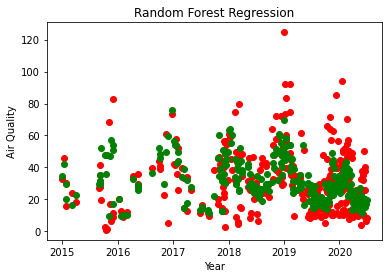

In [47]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Year')
plt.ylabel('Air Quality')
plt.show()

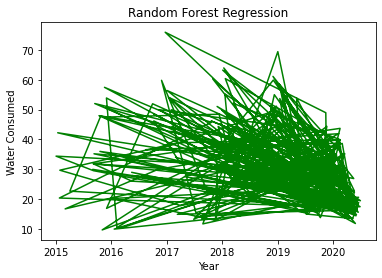

In [50]:
plt.plot(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Year')
plt.ylabel('Water Consumed')
plt.show()